In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ✅ 1. Carga del dataset

In [18]:
# 1. Cargar el dataset
df_train = pd.read_csv("adult.csv")

# 2. Renombrar columnas
df_train.rename(columns={
    'Age': 'Edad',
    'Workclass': 'Tipo de empleo',
    'Final Weight': 'Peso final',
    'Education': 'Educación',
    'EducationNum': 'Nivel educativo',
    'Marital Status': 'Estado civil',
    'Occupation': 'Ocupación',
    'Relationship': 'Relación',
    'Race': 'Raza',
    'Gender': 'Género',
    'Capital Gain': 'Ganancia de capital',
    'capital loss': 'Pérdida de capital',
    'Hours per Week': 'Horas por semana',
    'Native Country': 'País de origen',
    'Income': 'Ingreso'
}, inplace=True)

# Eliminar espacios al inicio y fin de las variables categóricas
for col in ['Educación', 'Ocupación', 'Tipo de empleo', 'Género']:
    df_train[col] = df_train[col].str.strip()

# 3. Traducir valores categóricos
df_train['Educación'] = df_train['Educación'].replace({
    'Preschool': 'Preescolar',
    '1st-4th': '1° a 4° grado',
    '5th-6th': '5° a 6° grado',
    '7th-8th': '7° a 8° grado',
    '9th': '9° grado',
    '10th': '10° grado',
    '11th': '11° grado',
    '12th': '12° grado',
    'HS-grad': 'Secundario',
    'Some-college': 'Terciario incompleto',
    'Assoc-acdm': 'Tec. académica',
    'Assoc-voc': 'Tec. vocacional',
    'Bachelors': 'Universitario',
    'Masters': 'Maestría',
    'Doctorate': 'Doctorado',
    'Prof-school': 'Carrera profesional'
})

df_train['Ocupación'] = df_train['Ocupación'].replace({
    'Tech-support': 'Soporte técnico',
    'Craft-repair': 'Artesano / Reparación',
    'Other-service': 'Otros servicios',
    'Sales': 'Ventas',
    'Exec-managerial': 'Ejecutivo / Gerencial',
    'Prof-specialty': 'Profesional',
    'Handlers-cleaners': 'Operario / Limpieza',
    'Machine-op-inspct': 'Operador / Inspector',
    'Adm-clerical': 'Administrativo',
    'Farming-fishing': 'Agricultura / Pesca',
    'Transport-moving': 'Transporte / Logística',
    'Priv-house-serv': 'Servicio doméstico',
    'Protective-serv': 'Seguridad',
    'Armed-Forces': 'Fuerzas armadas'
})

df_train['Tipo de empleo'] = df_train['Tipo de empleo'].replace({
    'Private': 'Privado',
    'Self-emp-not-inc': 'Autónomo (no inc.)',
    'Self-emp-inc': 'Autónomo (inc.)',
    'Federal-gov': 'Gob. federal',
    'Local-gov': 'Gob. local',
    'State-gov': 'Gob. estatal',
    'Without-pay': 'Sin remuneración',
    'Never-worked': 'Nunca trabajó'
})

df_train['Género'] = df_train['Género'].replace({
    'Male': 'Hombre',
    'Female': 'Mujer'
})


### ✅ 2. Información general:

-    Filas y columnas

-    Tipos de datos

-    Valores faltantes

-    Renombramos columnas a español

In [19]:
# Mostrar dimensiones del dataset

print("✔️ Conjuto de datos de entrenamiento:")
print(f"Filas: {df_train.shape[0]}  |  Columnas: {df_train.shape[1]}\n")

# Mostrar tipos de datos y valores no nulos
print("✔️ Información general del dataset:")
df_train.info()
print()

# Ver resumen estadístico de variables numéricas y categóricas
print("✔️ Resumen estadístico:")
display(df_train.describe(include='all'))

# Verificar valores faltantes por columna
print("✔️ Valores faltantes por columna:")
print(df_train.isnull().sum())



✔️ Conjuto de datos de entrenamiento:
Filas: 32561  |  Columnas: 15

✔️ Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Edad                 32561 non-null  int64 
 1   Tipo de empleo       32561 non-null  object
 2   Peso final           32561 non-null  int64 
 3   Educación            32561 non-null  object
 4   Nivel educativo      32561 non-null  int64 
 5   Estado civil         32561 non-null  object
 6   Ocupación            32561 non-null  object
 7   Relación             32561 non-null  object
 8   Raza                 32561 non-null  object
 9   Género               32561 non-null  object
 10  Ganancia de capital  32561 non-null  int64 
 11  Pérdida de capital   32561 non-null  int64 
 12  Horas por semana     32561 non-null  int64 
 13  País de origen       32561 non-null  object
 1

,Edad,Tipo de empleo,Peso final,Educación,Nivel educativo,Estado civil,Ocupación,Relación,Raza,Género,Ganancia de capital,Pérdida de capital,Horas por semana,País de origen,Ingreso
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Privado,NaN,Secundario,NaN,Married-civ-spouse,Profesional,Husband,White,Hombre,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


✔️ Valores faltantes por columna:
Edad                   0
Tipo de empleo         0
Peso final             0
Educación              0
Nivel educativo        0
Estado civil           0
Ocupación              0
Relación               0
Raza                   0
Género                 0
Ganancia de capital    0
Pérdida de capital     0
Horas por semana       0
País de origen         0
Ingreso                0
dtype: int64


#### 🤔 ¿Por qué df.isnull().sum() da cero, pero sabés que hay valores faltantes?

In [20]:
# Reemplazar valores ' ?' por NaN
"""
df_train.replace(' ?', np.nan, inplace=True)

# Ahora sí, ver valores faltantes reales
print("✔️ Valores faltantes reales tras limpieza:")
print(df_train.isnull().sum())

for col in df_train.columns:
    print(f"{col}: {(df_train[col] == '?').sum()} valores '?'")
"""
# Reemplazar todos los valores '?' por NaN reales
df_train = df_train.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '?' else x)

# Verificar nuevamente
print("✔️ Valores faltantes reales tras conversión:")
print(df_train.isnull().sum())


✔️ Valores faltantes reales tras conversión:
Edad                      0
Tipo de empleo         1836
Peso final                0
Educación                 0
Nivel educativo           0
Estado civil              0
Ocupación              1843
Relación                  0
Raza                      0
Género                    0
Ganancia de capital       0
Pérdida de capital        0
Horas por semana          0
País de origen          583
Ingreso                   0
dtype: int64


/tmp/ipykernel_5938/3967691791.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_train = df_train.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '?' else x)


In [21]:
# Cantidad total de valores faltantes
total_faltantes = df_train.isnull().sum().sum()

# Total de celdas posibles
total_celdas = df_train.shape[0] * df_train.shape[1]

# Porcentaje de valores faltantes
porcentaje_faltantes = (total_faltantes / total_celdas) * 100

print(f"✔️ Total de valores faltantes: {total_faltantes}")
print("✔️ Conjuto de datos de entrenamiento")
print(f"✔️ Total de filas o registros: {df_train.shape[0]}")
print(f"✔️ Total de celdas en el dataset: {total_celdas}")
print(f"📉 Porcentaje de valores faltantes: {porcentaje_faltantes:.2f}%")


✔️ Total de valores faltantes: 4262
✔️ Conjuto de datos de entrenamiento
✔️ Total de filas o registros: 32561
✔️ Total de celdas en el dataset: 488415
📉 Porcentaje de valores faltantes: 0.87%


In [22]:
print("Filas:", df_train.shape[0])
print("Columnas:", df_train.shape[1])

Filas: 32561
Columnas: 15


In [23]:
df_train.dtypes

Edad                    int64
Tipo de empleo         object
Peso final              int64
Educación              object
Nivel educativo         int64
Estado civil           object
Ocupación              object
Relación               object
Raza                   object
Género                 object
Ganancia de capital     int64
Pérdida de capital      int64
Horas por semana        int64
País de origen         object
Ingreso                object
dtype: object

### ✅ 3. Distribución de la variable objetivo: Ingreso

- A continuación, a través de ungrafico de barras se puede observar cómo se distribuyen las clases (<=50K, >50K).

✔️ Distribución de ingresos:
Ingreso
<=50K    24720
>50K      7841
Name: count, dtype: int64


/tmp/ipykernel_5938/2504443070.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_train, x='Ingreso', palette='pastel')


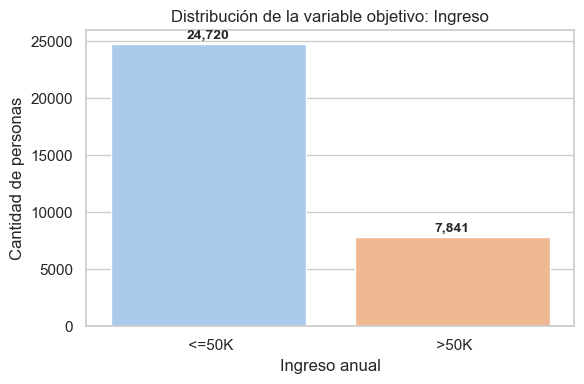

In [24]:
# Estilo visual de seaborn
sns.set(style="whitegrid")

# Conteo de clases
conteo_ingresos = df_train['Ingreso'].value_counts()

# Mostrar conteo en texto
print("✔️ Distribución de ingresos:")
print(conteo_ingresos)

# Gráfico de barras
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df_train, x='Ingreso', palette='pastel')

# Agregar los valores sobre cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 200,  # un poco arriba del borde
        s=f'{height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.title("Distribución de la variable objetivo: Ingreso")
plt.xlabel("Ingreso anual")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### 🎯 Clases de la variable objetivo: `Ingreso`

La variable `Ingreso` representa el nivel de ingreso anual de cada persona en el conjunto de datos. Por lo tanto, se puede identificar dos clases posibles:

| Clase   | Significado                                                     |
|---------|-----------------------------------------------------------------|
| `<=50K` | Persona con ingresos **menores o iguales a 50.000 dólares** al año |
| `>50K`  | Persona con ingresos **mayores a 50.000 dólares** al año        |

---

🔍 **Observación importante:**  
El conjunto de datos está **desbalanceado**, ya que la mayoría de los registros corresponden a personas con ingresos `<=50K`. Este desbalance puede afectar el rendimiento de los modelos de clasificación y se debe tener en cuenta en las siguientes etapas del análisis.


### ✅ 3: Distribución de variables numéricas

Se analizan las siguientes variables numéricas mediante histogramas para observar su comportamiento y detectar posibles concentraciones, asimetrías o valores extremos:

- `Edad`
- `Horas por semana`
- `Ganancia de capital`
- `Pérdida de capital`

📌 **Objetivo del análisis**:
- Identificar si las variables están distribuidas de forma normal, sesgada o multimodal.
- Detectar la presencia de valores atípicos (outliers) o comportamientos poco comunes que puedan requerir tratamiento previo al modelado.



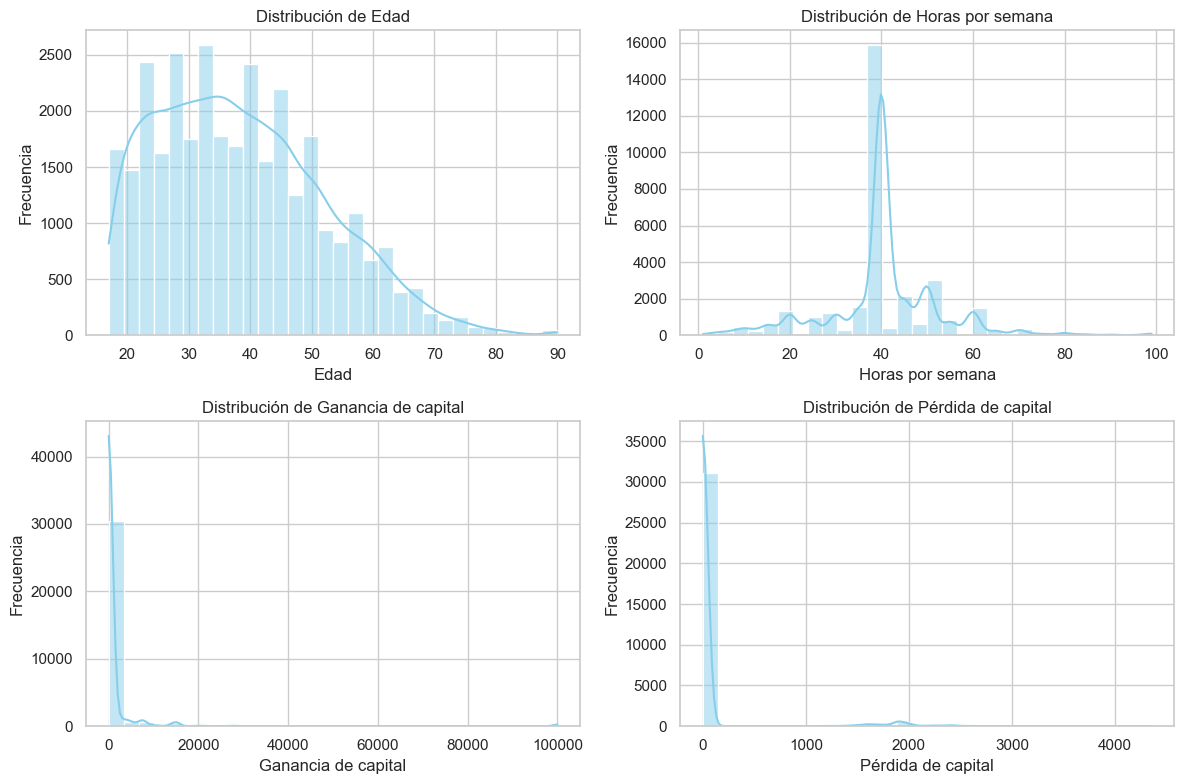

In [25]:
# Estilo
sns.set(style="whitegrid")

# Lista de variables numéricas a graficar
variables = ['Edad', 'Horas por semana', 'Ganancia de capital', 'Pérdida de capital']

# Crear una figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()  # Aplana el array de ejes para recorrerlo

# Crear los histogramas
for i, var in enumerate(variables):
    sns.histplot(data=df_train, x=var, bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()


📊 En los histogramas se puede observar:
- Una fuerte concentración de trabajadores de tiempo completo en 40 horas por semana.
- Un gran número de individuos sin ganancias ni pérdidas de capital (`0`), lo que sugiere una distribución sesgada.
- La edad se distribuye en forma algo asimétrica, con mayor densidad entre los 20 y 50 años.


### ✅ Detección de valores atípicos (outliers)

Se utilizan **boxplots** para analizar visualmente la presencia de valores atípicos en las variables numéricas:

- `Edad`
- `Horas por semana`
- `Ganancia de capital`
- `Pérdida de capital`

📌 **Objetivo del análisis**:
- Detectar valores extremos que podrían influir negativamente en los modelos de machine learning.
- Considerar decisiones futuras como la transformación, imputación o eliminación de outliers.

📊 **Observaciones generales**:
- En `Ganancia de capital` y `Pérdida de capital`, se observan muchos valores nulos (`0`) y algunos valores extremos muy altos.
- En `Horas por semana`, la mayoría trabaja 40 horas, pero hay casos extremos de personas que trabajan más de 80 horas.
- En `Edad`, los outliers son menos evidentes, pero existen algunos registros de personas mayores de 80 años.

Estos valores extremos deberán tenerse en cuenta en las etapas posteriores de preprocesamiento y modelado.


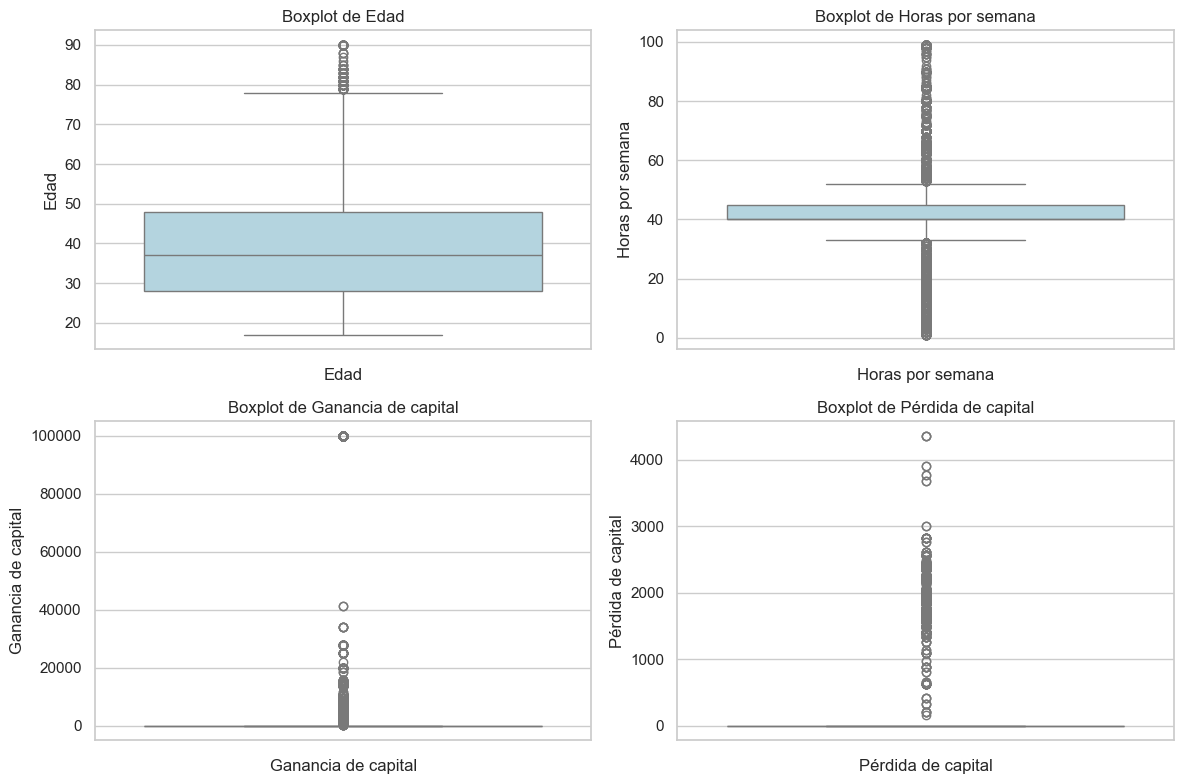

In [26]:
# Lista de variables numéricas
variables = ['Edad', 'Horas por semana', 'Ganancia de capital', 'Pérdida de capital']

# Crear figura
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Graficar boxplots
for i, var in enumerate(variables):
    sns.boxplot(data=df_train, y=var, ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot de {var}')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()


📊 **Observaciones generales**:
- En `Ganancia de capital` y `Pérdida de capital`, se observan muchos valores nulos (`0`) y algunos valores extremos muy altos.
- En `Horas por semana`, la mayoría trabaja 40 horas, pero hay casos extremos de personas que trabajan más de 80 horas.
- En `Edad`, los outliers son menos evidentes, pero existen algunos registros de personas mayores de 80 años.

Estos valores extremos deberán tenerse en cuenta en las etapas posteriores de preprocesamiento y modelado.


### ✅ 4 Análisis de variables categóricas por clase de ingreso

Se analizan las siguientes variables categóricas para observar cómo se distribuyen las clases de `Ingreso` (`<=50K` y `>50K`) en cada una:

- `Educación`
- `Ocupación`
- `Tipo de empleo`
- `Género`

📌 **Objetivo del análisis**:
- Detectar si hay diferencias significativas entre las clases de ingreso dentro de cada categoría.
- Identificar patrones que puedan ser útiles para un modelo de clasificación (por ejemplo: ¿ciertos niveles educativos están más asociados a ingresos altos?).

📊 **Observaciones esperadas**:
- En `Educación`, se espera una mayor proporción de `>50K` en niveles superiores como "Master" o "Doctorate".
- En `Ocupación`, profesiones técnicas o ejecutivas podrían estar más asociadas a ingresos altos.
- En `Tipo de empleo`, el empleo en el sector privado podría tener una distribución diferente al gobierno o autoempleo.
- En `Género`, es común observar un sesgo hacia mayores ingresos en hombres, lo cual puede ser analizado y tratado según el enfoque del modelo.

Estos gráficos ayudan a visualizar posibles relaciones entre las variables categóricas y la variable objetivo.


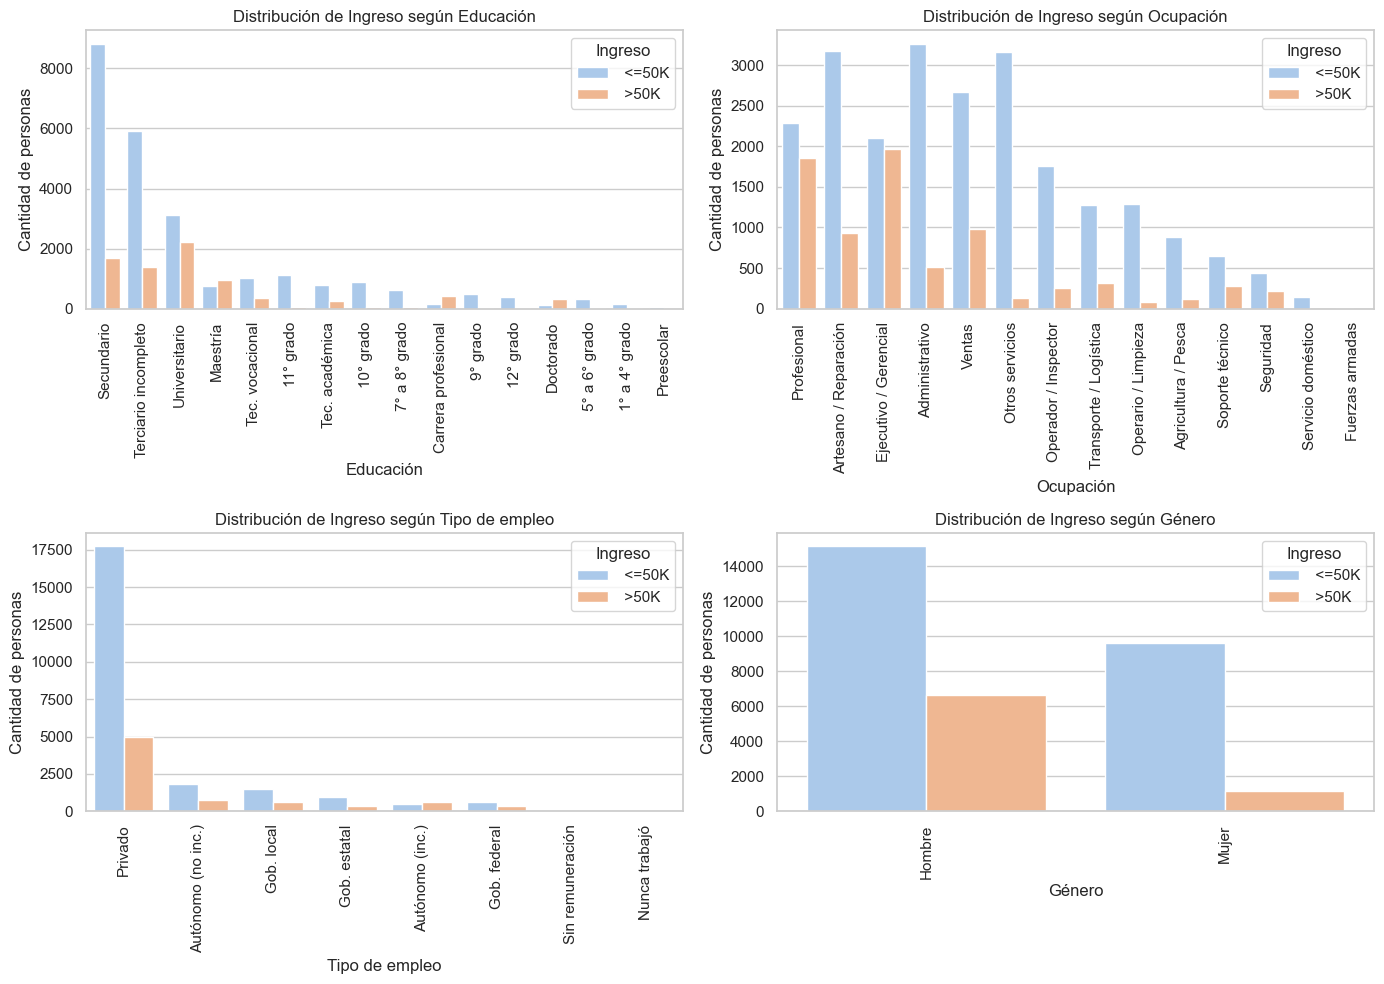

In [27]:
# Variables categóricas en español ya traducidas
categoricas = ['Educación', 'Ocupación', 'Tipo de empleo', 'Género']

# Crear figura de subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, var in enumerate(categoricas):
    orden = df_train[var].value_counts().index
    sns.countplot(data=df_train, x=var, hue='Ingreso', order=orden, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Distribución de Ingreso según {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Cantidad de personas')
    axes[i].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()


### 🔎 Observación sobre la relación entre educación e ingreso

Al analizar la variable `Educación` segmentada por clase de `Ingreso`, se observa lo siguiente:

- Los niveles educativos más bajos, como "1° a 4° grado", "7° a 8° grado" o incluso "Secundario", presentan una gran cantidad de personas, pero la mayoría pertenece a la clase `<=50K`.
- En cambio, los niveles más altos de formación —como **"Maestría"** o **"Doctorado"**— tienen **pocas personas**, pero **una mayor proporción** de ellas pertenece a la clase `>50K`.

📌 **Interpretación clave**:
> A medida que aumenta el nivel educativo, también aumenta la probabilidad de pertenecer al grupo con ingresos mayores a 50K, aunque ese grupo sea numéricamente menor.

Esta relación indica que la variable `Educación` es potencialmente **predictiva** para estimar el ingreso de una persona, ya que existe una correlación cualitativa entre el nivel académico y la clase económica.


### 🔎 Observación sobre la relación entre ocupación e ingreso

El gráfico que cruza la variable `Ocupación` con el `Ingreso` permite observar diferencias marcadas según el tipo de actividad laboral:

- Profesiones como **"Profesional"**, **"Ejecutivo / Gerencial"** y **"Soporte técnico"** presentan una mayor proporción de personas con ingresos `>50K`, lo que sugiere que son ocupaciones mejor remuneradas.
- En cambio, en ocupaciones como **"Servicio doméstico"**, **"Agricultura / Pesca"**, **"Operario / Limpieza"** y **"Transporte / Logística"**, predomina ampliamente la clase `<=50K`.

📌 **Conclusión**:
> El tipo de ocupación tiene una fuerte relación con el ingreso. Las ocupaciones técnicas y profesionales están más asociadas a altos ingresos, mientras que trabajos manuales o de servicios básicos concentran mayormente ingresos bajos.


### 🔎 Observación sobre tipo de empleo e ingreso

La variable `Tipo de empleo` también muestra un patrón claro cuando se la relaciona con el ingreso:

- El sector **"Privado"** es el más frecuente, y en él predominan los ingresos `<=50K`, aunque también hay un grupo significativo `>50K`.
- En empleos **autónomos incorporados (Autónomo inc.)** y en **el gobierno federal**, se observa una proporción más alta de ingresos `>50K` respecto a otros sectores.
- Categorías como **"Sin remuneración"** o **"Nunca trabajó"** presentan naturalmente ingresos muy bajos.

📌 **Interpretación**:
> Trabajar en sectores formales, especialmente como autónomo con empresa propia o en ciertos empleos del gobierno, aumenta las posibilidades de tener un ingreso mayor a 50K.


### ✅ Conclusiones del Análisis Exploratorio

A partir de las visualizaciones y estadísticas realizadas, se destacan los siguientes puntos relevantes para el modelado predictivo del ingreso:

---

#### 🧠 Variables numéricas

- `Edad`: su distribución es asimétrica; la mayoría de las personas tienen entre 25 y 50 años. Se observan valores extremos en ambos extremos de la edad.
- `Horas por semana`: gran concentración en 40 horas semanales (empleos de tiempo completo). Hay valores atípicos por encima de 60 horas.
- `Ganancia de capital` y `Pérdida de capital`: muy sesgadas, con mayoría de ceros y unos pocos valores extremos.

---

#### 📊 Variables categóricas

- `Educación`: a mayor nivel educativo, **mayor proporción** de personas con ingresos `>50K`, especialmente en niveles como **Maestría** y **Doctorado**.
- `Ocupación`: trabajos profesionales, ejecutivos o técnicos están más asociados a ingresos `>50K`, mientras que ocupaciones manuales concentran ingresos `<=50K`.
- `Tipo de empleo`: aunque el sector privado es predominante, los ingresos más altos se observan más frecuentemente en empleos autónomos incorporados y gubernamentales.
- `Género`: hay más hombres en ambos grupos de ingreso, y una **mayor proporción de hombres con ingresos >50K** respecto a mujeres.

---

### 🧩 Implicancias para el modelado

- Las variables `Educación`, `Ocupación`, `Tipo de empleo` y `Género` presentan asociaciones visuales fuertes con la variable objetivo `Ingreso`, por lo que se consideran **buenas candidatas predictoras**.
- Las variables numéricas también deben ser normalizadas y evaluadas en relación con el ingreso mediante técnicas estadísticas o modelos supervisados.

---

Este análisis exploratorio proporciona una base sólida para el diseño de modelos de clasificación, permitiendo elegir las variables más relevantes y detectar posibles fuentes de sesgo, desbalance o ruido.


### ✅ 5 Cruces entre variables

-  Educación + Género

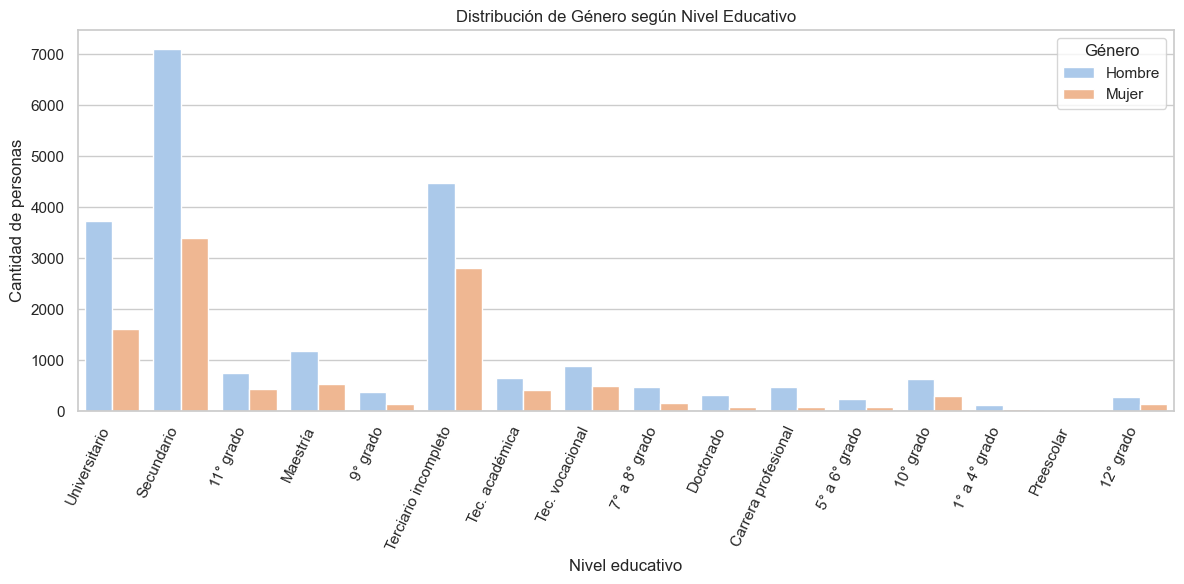

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='Educación', hue='Género', palette='pastel')
plt.title('Distribución de Género según Nivel Educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=65, ha='right')
plt.tight_layout()
plt.show()

- Estado civil + Ingreso

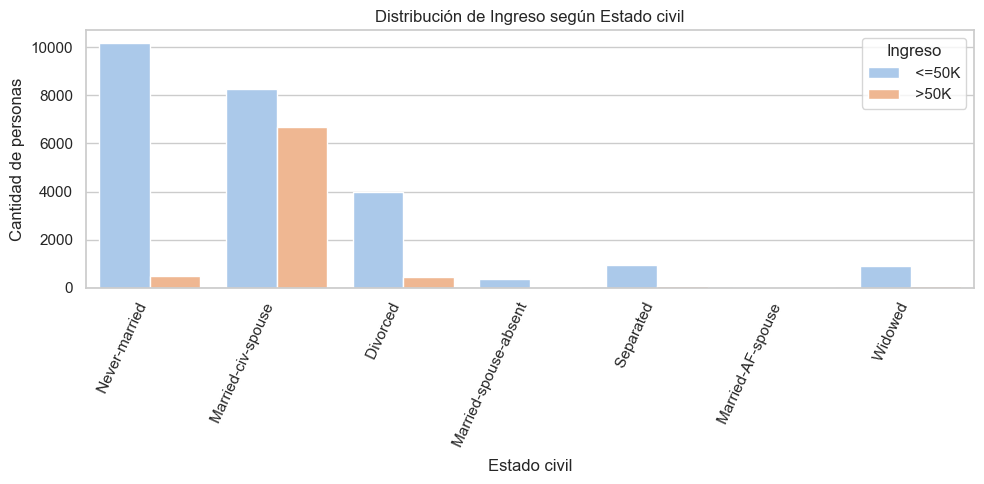

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, x='Estado civil', hue='Ingreso', palette='pastel')
plt.title('Distribución de Ingreso según Estado civil')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=65, ha='right')
plt.tight_layout()
plt.show()


### ✅ Cruces entre variables categóricas

En esta sección se exploran posibles **interacciones entre variables categóricas**, observando cómo se combinan entre sí para influir en el nivel de ingreso.

---

#### 📊 Educación + Género

Se analiza la distribución del género según el nivel educativo para detectar posibles desigualdades o patrones diferenciados en el acceso a la educación.

- Se observa una mayor representación de hombres en niveles superiores de formación (como "Universitario", "Maestría" y "Doctorado").
- Las mujeres están más presentes en niveles intermedios como "Secundario" o "Terciario incompleto".

💡 Este cruce permitirá más adelante evaluar si el efecto del nivel educativo sobre el ingreso está mediado por el género.

---

#### 📊 Estado civil + Ingreso

Se estudia la distribución del ingreso según el estado civil:

- Las personas **casadas con cónyuge presente** tienen una mayor proporción de ingresos `>50K`, posiblemente por estabilidad laboral o responsabilidades familiares compartidas.
- Las personas **nunca casadas** y **divorciadas** se concentran mayoritariamente en la clase `<=50K`.

📌 Este patrón podría reflejar condiciones económicas diferenciales asociadas a situaciones personales o familiares.

---

Estos cruces enriquecen el análisis y pueden motivar la creación de variables combinadas o interacciones explícitas en futuros modelos predictivos.


### ✅ 6 Análisis de correlación entre variables numéricas.

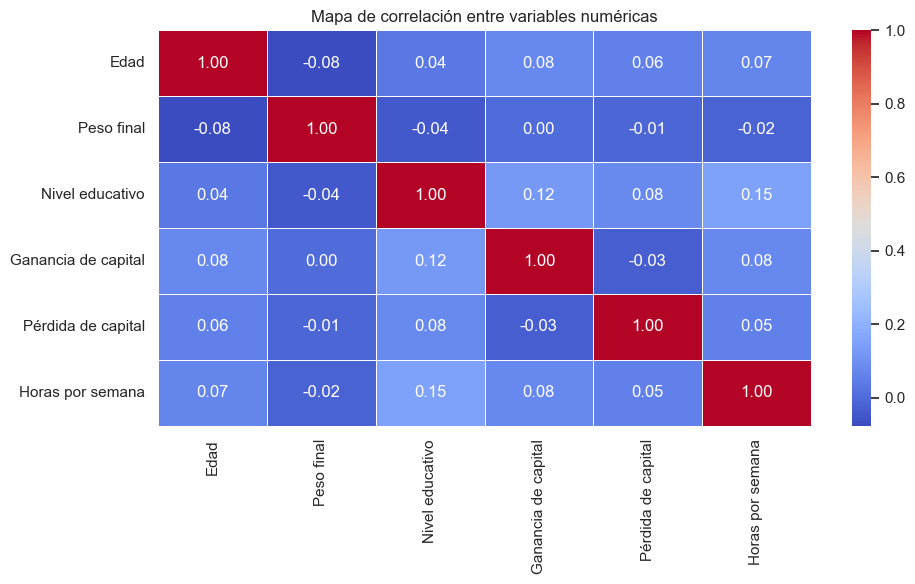

In [30]:


# Seleccionar solo columnas numéricas
variables_numericas = df_train.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
matriz_corr = variables_numericas.corr()

# Graficar
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de correlación entre variables numéricas")
plt.tight_layout()
plt.show()


### ✅  Análisis de correlación entre variables numéricas

Se analiza la matriz de correlación entre las variables numéricas del dataset para:

- Detectar relaciones lineales fuertes
- Identificar posibles redundancias
- Tomar decisiones sobre reducción de variables antes del modelado

---

#### 📊 Observaciones clave a partir del mapa de calor

- ✅ No se detectan **correlaciones fuertes** entre las variables numéricas.
- ✅ Todas las correlaciones absolutas están **por debajo de 0.2**, lo que indica que las variables son **relativamente independientes entre sí**.

---

#### 🧠 Detalles específicos:

| Variables correlacionadas         | Correlación | Interpretación |
|----------------------------------|-------------|----------------|
| Nivel educativo - Horas por semana | 0.15        | Muy débil       |
| Nivel educativo - Ganancia de capital | 0.12     | Muy débil       |
| Edad - Ganancia de capital        | 0.08        | Nula a débil    |
| Edad - Nivel educativo            | 0.04        | Insignificante  |
| Peso final - cualquier variable   | ≈ 0         | No aporta valor predictivo |

---

#### ✅ Implicancias para el modelado:

- Las variables numéricas **no presentan redundancias**, por lo que **todas pueden ser retenidas** en una primera etapa de modelado.
- La variable `Nivel educativo` no se solapa numéricamente con ninguna otra.
- `Peso final` muestra **muy baja correlación con todas las demás**, por lo que se puede considerar **descartarla**, o mantenerla solo si el modelo lo justifica.

Este análisis respalda la decisión de mantener la mayoría de las variables numéricas para explorar su impacto predictivo en etapas posteriores.


    ### ✅ Conclusiones del Análisis Exploratorio de Datos (EDA)

---

### 📊 Resumen general

El análisis exploratorio permitió conocer en profundidad las características del conjunto de datos y su relación con la variable objetivo `Ingreso`. A través de visualizaciones, estadísticas y limpieza, se identificaron patrones relevantes, posibles transformaciones, y la calidad real de los datos disponibles.

---

### 🧠 Variables candidatas a ingeniería de características

- `Educación` y `Nivel educativo`: representan la misma información en diferentes formatos (categórico y numérico). Puede evaluarse generar una variable binaria como "educación superior" (universitario o más).
- `Ganancia de capital` y `Pérdida de capital`: podrían combinarse en una sola variable `Balance de capital = ganancia - pérdida`, para simplificar la estructura.
- `Estado civil` y `Relación`: muestran patrones interesantes combinados con el ingreso. Podrían fusionarse en una variable de tipo "estructura familiar".

---

### 🗑️ Variables candidatas a ser descartadas

- `Peso final`: presenta correlación casi nula con todas las demás variables, lo que sugiere que **no aporta valor predictivo directo**.
- `Nivel educativo`: si se conserva `Educación` como variable categórica principal, esta variable numérica podría eliminarse, salvo que el modelo requiera solo entradas numéricas.

---

### ⚠️ Observaciones para preprocesamiento

- **Imputación**: Se detectaron **4262 valores faltantes reales (`np.nan`)**, que estaban originalmente codificados como `'?'`, distribuidos en tres variables categóricas:
  - `Tipo de empleo`: 1836 valores faltantes (≈ 5.64%)
  - `Ocupación`: 1843 valores faltantes (≈ 5.66%)
  - `País de origen`: 583 valores faltantes (≈ 1.79%)
  
  En total, representan un **0.87% del conjunto de datos** (sobre 488.415 celdas).  
  ✅ Se decidió imputar con la categoría `"Desconocido"` en estas columnas, ya que:
  - Permite conservar todos los registros
  - No introduce sesgo hacia las clases más frecuentes
  - Conserva la semántica de valor no declarado

- **Normalización**: Las variables numéricas (`Edad`, `Ganancia de capital`, `Pérdida de capital`, `Horas por semana`) tienen escalas diferentes. Se recomienda aplicar estandarización (`z-score`) o normalización (`MinMax`) antes de modelar, si se utilizan algoritmos sensibles a escala.

- **Codificación**: Las variables categóricas deben transformarse para su uso en modelos:
  - `Label Encoding` o `Ordinal Encoding` para árboles de decisión
  - `One-Hot Encoding` para modelos lineales o redes neuronales

---

### 📌 Conclusión final

El conjunto de datos está en condiciones óptimas para comenzar el preprocesamiento orientado al modelado.  
El análisis exploratorio permitió identificar valores faltantes ocultos, correlaciones débiles, variables clave para ingeniería de atributos y las estrategias más adecuadas para su tratamiento.  
Estos hallazgos orientan el diseño de un pipeline de datos robusto para la etapa de clasificación supervisada.


In [31]:
variables_con_faltantes = ['Tipo de empleo', 'Ocupación', 'País de origen']

for col in variables_con_faltantes:
    print(f"🔍 Distribución cruzada para: {col}")
    tabla = pd.crosstab(df_train[col], df_train['Ingreso'], margins=True, normalize='index')
    display(tabla.sort_values(by=' >50K', ascending=False).head(10))  # Podés cambiar el orden si querés
    print("\n" + "-"*60 + "\n")


🔍 Distribución cruzada para: Tipo de empleo


Ingreso,<=50K,>50K
Tipo de empleo,,
Autónomo (inc.),0.442652,0.557348
Gob. federal,0.613542,0.386458
Gob. local,0.705208,0.294792
Autónomo (no inc.),0.715073,0.284927
Gob. estatal,0.728043,0.271957
All,0.751017,0.248983
Privado,0.781327,0.218673
Nunca trabajó,1.000000,0.000000
Sin remuneración,1.000000,0.000000



------------------------------------------------------------

🔍 Distribución cruzada para: Ocupación


Ingreso,<=50K,>50K
Ocupación,,
Ejecutivo / Gerencial,0.515986,0.484014
Profesional,0.550966,0.449034
Seguridad,0.674884,0.325116
Soporte técnico,0.695043,0.304957
Ventas,0.730685,0.269315
All,0.750960,0.249040
Artesano / Reparación,0.773359,0.226641
Transporte / Logística,0.799624,0.200376
Administrativo,0.865517,0.134483



------------------------------------------------------------

🔍 Distribución cruzada para: País de origen


Ingreso,<=50K,>50K
País de origen,,
Iran,0.581395,0.418605
France,0.586207,0.413793
India,0.600000,0.400000
Taiwan,0.607843,0.392157
Japan,0.612903,0.387097
Yugoslavia,0.625000,0.375000
Cambodia,0.631579,0.368421
Italy,0.657534,0.342466
England,0.666667,0.333333



------------------------------------------------------------



## 🧩 Análisis de distribución cruzada e imputación

### 🔍 Objetivo
Evaluar si la imputación con la **moda** en las variables con valores faltantes (`Tipo de empleo`, `Ocupación`, `País de origen`) introduce **más desbalance** en la variable objetivo `Ingreso`.

---

### 📊 Resultados de la distribución cruzada

Se analizaron las proporciones de `<=50K` y `>50K` en cada categoría de las variables:

#### ✅ Tipo de empleo
- La categoría más frecuente (`Privado`) tiene:
  - `<=50K`: **78.1%**
  - `>50K`: **21.9%**
- 👉 Imputar con `"Privado"` **aumentaría el desbalance** a favor de la clase mayoritaria.

#### ✅ Ocupación
- Categorías como `"Administrativo"` y `"Profesional"` tienen:
  - `"Administrativo"`: `<=50K` ≈ **86.6%**
  - `"Profesional"`: `<=50K` ≈ **55.1%**
- 👉 Imputar con cualquiera de ellas **refuerza la clase `<=50K`**.

#### ✅ País de origen
- La categoría `"United-States"` (moda) está sobrerrepresentada con:
  - `<=50K`: **muy alto porcentaje**
- 👉 Imputar con `"United-States"` **amplificaría el desbalance** de clases.

---

### ⚠️ Conclusión

> Imputar con la **moda** en estas columnas aumentaría artificialmente la proporción de la clase dominante `<=50K`, reforzando el desbalance ya existente en el dataset.

---

### ✅ Decisión

Se opta por **imputar con la categoría `"Desconocido"`**, que:

- No favorece ninguna clase
- Permite que el modelo aprenda a manejar la ausencia de información
- Preserva la neutralidad y la integridad del análisis

```python
df_train['Tipo de empleo'].fillna('Desconocido', inplace=True)
df_train['Ocupación'].fillna('Desconocido', inplace=True)
df_train['País de origen'].fillna('Desconocido', inplace=True)


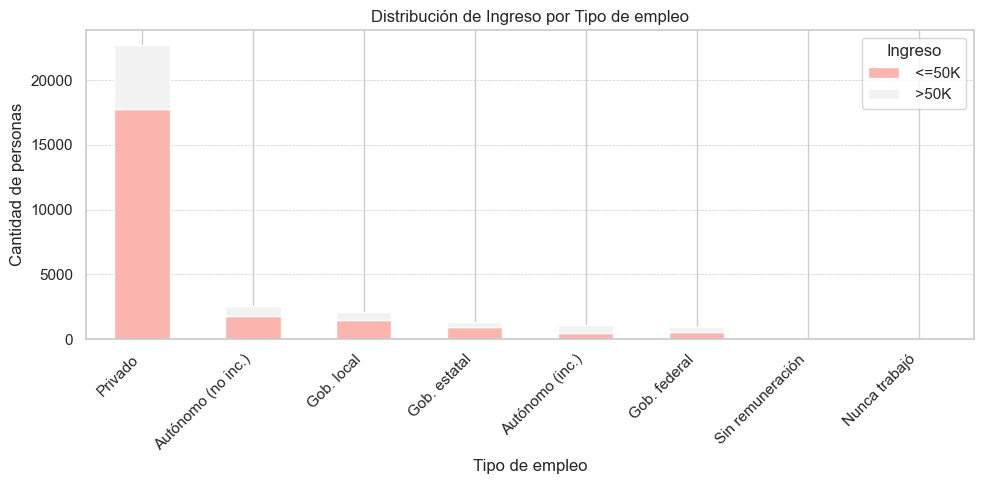

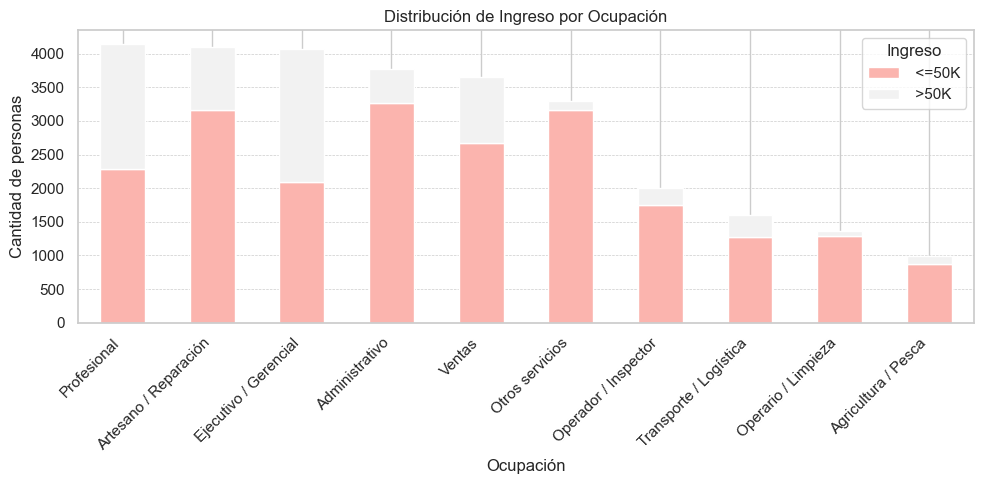

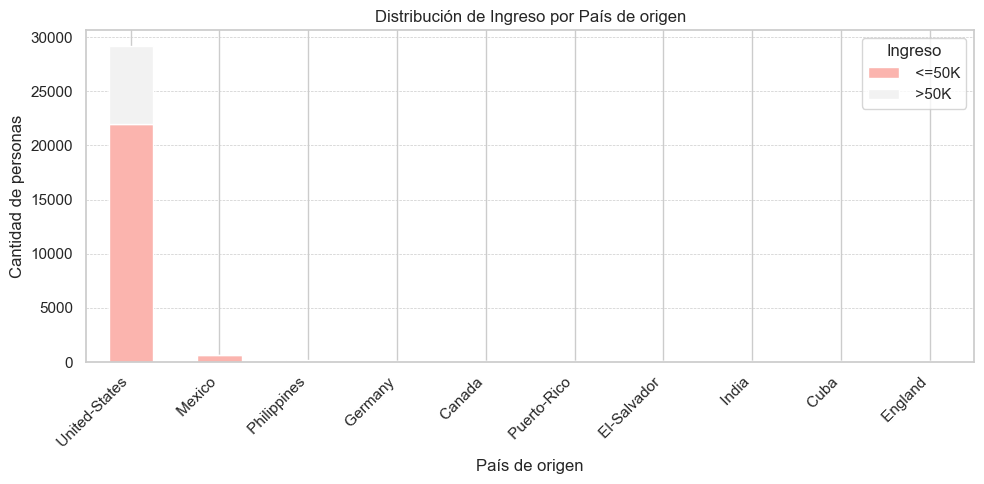

In [32]:
# Lista de variables categóricas a graficar
variables = ['Tipo de empleo', 'Ocupación', 'País de origen']

for col in variables:
    # Tabla de frecuencia cruzada (conteo, no porcentaje)
    tabla = pd.crosstab(df_train[col], df_train['Ingreso'])

    # Ordenar por cantidad total (opcional)
    tabla = tabla.loc[tabla.sum(axis=1).sort_values(ascending=False).index[:10]]

    # Gráfico de barras apiladas
    tabla.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Pastel1')

    plt.title(f"Distribución de Ingreso por {col}")
    plt.xlabel(col)
    plt.ylabel("Cantidad de personas")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Ingreso")
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()
